# STAT207 Final Project - UCL 2021-2022 

Chris Trujillo

## 1. Introduction

In [235]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [236]:
df_goals = pd.read_csv('goals.csv')
df_goals = df_goals[['player_name', 'club', 'position', 'match_played', 'right_foot', 'left_foot']]
df_attempt = pd.read_csv('attempts.csv')
df_attempt = df_attempt[['player_name', 'club', 'position', 'match_played', 'total_attempts']]
df_discip = pd.read_csv('disciplinary.csv')
df_discip = df_discip[['player_name', 'club', 'position', 'match_played', 'fouls_committed', 'fouls_suffered']]
df_key = pd.read_csv('key_stats.csv')
print(df_goals.columns, df_attempt.columns, df_key.columns)

Index(['player_name', 'club', 'position', 'match_played', 'right_foot',
       'left_foot'],
      dtype='object') Index(['player_name', 'club', 'position', 'match_played', 'total_attempts'], dtype='object') Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered'],
      dtype='object')


In [317]:
df_main = df_key[['player_name', 'club', 'position', 'match_played', 'minutes_played', 'goals', 'assists']]
df_main = pd.merge(df_main, df_attempt, how='inner', on=['player_name', 'club', 'position', 'match_played'])
df_main = pd.merge(df_main, df_goals, how='inner', on=['player_name', 'club', 'position', 'match_played'])
df_main = pd.merge(df_main, df_discip, how='inner', on=['player_name', 'club', 'position', 'match_played'])
df_main

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered
0,Vinícius Júnior,Real Madrid,Forward,13,1199,4,6,27,3,1,13,24
1,Benzema,Real Madrid,Forward,12,1106,15,1,45,11,1,2,4
2,Alaba,Real Madrid,Defender,12,1040,1,0,5,0,1,9,1
3,Kroos,Real Madrid,Midfielder,12,902,2,0,12,1,1,7,18
4,Asensio,Real Madrid,Forward,8,207,1,2,5,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
168,Nikolov,Sheriff,Midfielder,5,97,1,0,3,1,0,4,3
169,Kulusevski,Juventus,Midfielder,5,80,1,0,1,0,0,6,0
170,Alcácer,Villarreal,Forward,3,73,1,0,4,1,0,1,0
171,Choupo-Moting,Bayern,Midfielder,4,49,1,0,3,0,0,2,1


In [318]:
df_main["goals_per_game"] = df_main["goals"]/df_main["match_played"]
df_main

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game
0,Vinícius Júnior,Real Madrid,Forward,13,1199,4,6,27,3,1,13,24,0.307692
1,Benzema,Real Madrid,Forward,12,1106,15,1,45,11,1,2,4,1.250000
2,Alaba,Real Madrid,Defender,12,1040,1,0,5,0,1,9,1,0.083333
3,Kroos,Real Madrid,Midfielder,12,902,2,0,12,1,1,7,18,0.166667
4,Asensio,Real Madrid,Forward,8,207,1,2,5,0,1,2,0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Nikolov,Sheriff,Midfielder,5,97,1,0,3,1,0,4,3,0.200000
169,Kulusevski,Juventus,Midfielder,5,80,1,0,1,0,0,6,0,0.200000
170,Alcácer,Villarreal,Forward,3,73,1,0,4,1,0,1,0,0.333333
171,Choupo-Moting,Bayern,Midfielder,4,49,1,0,3,0,0,2,1,0.250000


## 2. Descriptive Analytics

Compare: x=’total attempts’ y=’goals’ z=’position’. What is the relationship between attempts and goals for each position. We want to answer, what position has a higher goal conversion rate?

In [319]:
df_main.describe()

,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,6.872832,458.427746,1.988439,0.826590,9.826590,0.930636,0.699422,5.826590,6.034682,0.293218
std,2.495580,234.722825,2.017333,1.188114,8.197702,1.404245,1.162320,3.606194,4.977736,0.222278
min,2.000000,38.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.076923
25%,5.000000,293.000000,1.000000,0.000000,4.000000,0.000000,0.000000,3.000000,2.000000,0.166667
50%,6.000000,446.000000,1.000000,0.000000,8.000000,1.000000,0.000000,5.000000,4.000000,0.222222
75%,8.000000,578.000000,2.000000,1.000000,12.000000,1.000000,1.000000,8.000000,9.000000,0.333333
max,13.000000,1199.000000,15.000000,6.000000,45.000000,11.000000,8.000000,19.000000,24.000000,1.375000


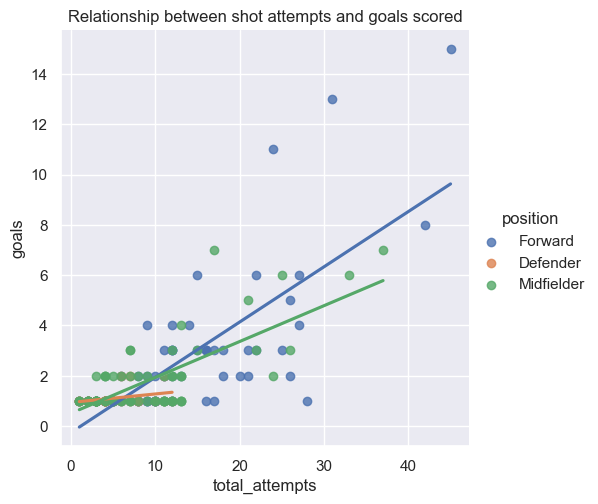

In [320]:
sns.lmplot(x='total_attempts', y='goals', hue='position', data=df_main, ci=False)
plt.title('Relationship between shot attempts and goals scored')
plt.show()

In [322]:
df_main_pos = df_main.groupby(['position'])
df_main_posmean = df_main_pos.describe().filter(regex='mean')
df_main_posmean

,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
position,,,,,,,,,,
Defender,6.843750,536.562500,1.093750,0.406250,4.750000,0.468750,0.250000,6.375000,3.968750,0.180047
Forward,6.897059,439.426471,2.647059,0.970588,13.250000,1.235294,0.941176,5.382353,6.529412,0.373881
Midfielder,6.863014,441.876712,1.767123,0.876712,8.863014,0.849315,0.671233,6.000000,6.479452,0.267690


In [323]:
goals_per_attempt_avg = df_main_posmean['goals']/df_main_posmean['total_attempts']
goals_per_attempt_avg

,mean
position,
Defender,0.230263
Forward,0.199778
Midfielder,0.199382


Here we can see that the most accurate position, as defined by goals/attempt, is actually the Defender, with Forward and Midfielder have nearly identical goal conversion rates.

## 3. Inference

Research Question: What position, forward or midfielder, is expected to score the most per game?
Hypothesis: We expect a forward to score more per game than a midfielder

In [239]:
df_mid = df_main["goals_per_game"][df_main["position"] == "Midfielder"]
df_forward = df_main["goals_per_game"][df_main["position"] == "Forward"]

In [240]:
n_mid=len(df_mid)
mean_mid=df_mid.mean()
std_mid=df_mid.std()
print('Sample Size Midfielders:', n_mid)
print('Sample Mean of Midfielders:', mean_mid)
print('Sample Standard Deviation of Midfielders:', std_mid)

Sample Size Midfielders: 73
Sample Mean of Midfielders: 0.26768954029228
Sample Standard Deviation of Midfielders: 0.17901212540143796


In [241]:
n_forward=len(df_forward)
mean_forward=df_forward.mean()
std_forward=df_forward.std()
print('Sample Size Midfielders:', n_forward)
print('Sample Mean of Midfielders:', mean_forward)
print('Sample Standard Deviation of Midfielders:', std_forward)

Sample Size Midfielders: 68
Sample Mean of Midfielders: 0.37388098013098015
Sample Standard Deviation of Midfielders: 0.2750081953026654


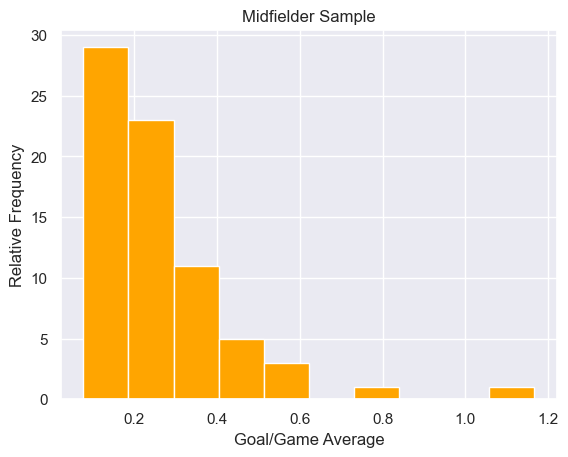

In [242]:
df_mid.hist(color='orange')
plt.title('Midfielder Sample')
plt.xlabel('Goal/Game Average')
plt.ylabel('Relative Frequency')
plt.show()

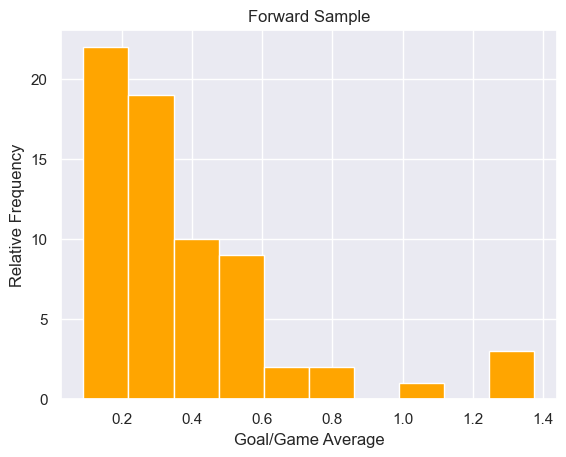

In [243]:
df_forward.hist(color='orange')
plt.title('Forward Sample')
plt.xlabel('Goal/Game Average')
plt.ylabel('Relative Frequency')
plt.show()

1. Midfielder sample is not randomly sampled because the entire sample is not randomly sampled, as it is a record of players and their stats for the 2021-2022 season.
2. n_mid(73) < 10% All midfielders in Champions League history
3. Forward sample is randomly sampled.
4. n_forward(68) < 10% of all Forwards in Champions League history.
5. Both sample sizes are greater than 30.
6. We can assume that there is no pairwise relationship between the players in the midfield and forward.

Conditions are not met due to condition 1 (randomness) but we continue with caution.

mu1= Goals per game average for midfielders.
mu2 = Goals per game average for forwards.


Hypothesis:
Ho: mu1 - mu2 = 0
Ha: mu1 - mu2 != 0

In [244]:
point_estimate=mean_mid - mean_forward
print('Point Estimate: ', point_estimate)

Point Estimate:  -0.10619143983870016


In [245]:
standard_error=np.sqrt((std_mid**2)/n_mid + (std_forward**2)/n_forward)
print('Standard Error: ', standard_error)

Standard Error:  0.039384970661355316


In [246]:
test_stat= (point_estimate-0)/standard_error
print('Test statistic (ie. tscore of the point estimate):' ,test_stat)

Test statistic (ie. tscore of the point estimate): -2.6962427051620383


In [247]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=67))
print('pvalue: ' ,pvalue)

pvalue:  0.00885990011168869


Because our p-val is less than our alpha value of 0.05, we reject the null hypothesis. Thus, we have sufficient evidence to suggest that the population means goals per game for all midfielders and for all forwards are different, or that there is
an association between position and the goals per game ratio).

## 4. Linear Regression

We want to determine, how strong of a relationship is there between goals scored and position, assists, total_attempts, fouls_committed * fouls_suffered, and minutes_played * match_played?

In [325]:
res_lin = smf.ols('goals ~ position + assists + total_attempts + fouls_committed*fouls_suffered + minutes_played*match_played', data=df_main).fit()
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  goals   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     25.40
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.93e-28
Time:                        17:59:11   Log-Likelihood:                -284.80
No. Observations:                 173   AIC:                             591.6
Df Residuals:                     162   BIC:                             626.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.9866      0.653      1.511      0.133      -0.303       2.276
position[T.Forward]                0.4257      0.372      1.145      0.254      -0.308       1.160
position[T.Midfielder]             0.3026      0.333      0.909      0.365      -0.355       0.960
assists                           -0.2048      0.100     -2.038      0.043      -0.403      -0.006
total_attempts                     0.1912      0.019      9.987      0.000       0.153       0.229
fouls_committed                   -0.0115      0.060     -0.192      0.848      -0.130       0.107
fouls_suffered                    -0.1170      0.047     -2.502      0.013      -0.209      -0.025
fouls_committed:fouls_suffered     0.0061      0.006      1.091      0.277      -0.005       0.017
minutes_played                  8.425e-05      0.002      0.046      0.964      -0.004       0.004
match_played                      -0.2111      0.107     -1.964      0.051      -0.423       0.001
minutes_played:match_played        0.0003      0.000      1.549      0.123   -6.94e-05       0.001
==============================================================================
Omnibus:                       80.487   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.791
Skew:                           1.551   Prob(JB):                    2.77e-122
Kurtosis:                      11.249   Cond. No.                     3.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

yhat = 1.3088 + 0.4257 * Position[Forward] + 0.3026 * Position[Midfielder] - 0.2048 * Assists + 0.1912 * Total_attempts - 0.0115 * Fouls_committed - 0.1170 * Fouls_suffered + 0.0061 * Fouls_committed * Fouls_suffered + 0.00008425 * Minutes_played - 0.2111 * Match_played + 0.0003 * Minutes_played * Match_played

We also have 61.1% of the variability in goals explained by the linear relationship with our variables selected. This is an alright percentage, it isn't amazing, but it indicates a decent predictive capability.

We also have evidence that the variables fouls_suffered, assists, and total_attempts are non-zero, as indicated by the p-values being below an alpha significance level of 0.05

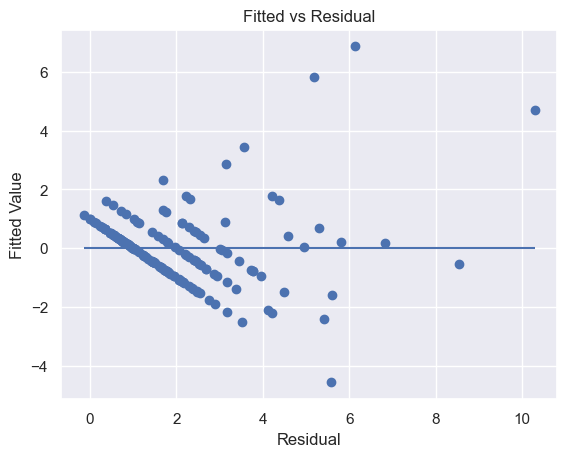

In [326]:
plt.scatter(res_lin.fittedvalues, res_lin.resid)
plt.xlabel('Residual')
plt.ylabel('Fitted Value')
plt.title('Fitted vs Residual')
plt.hlines(y=0, xmin=np.min(res_lin.fittedvalues), xmax=np.max(res_lin.fittedvalues))
plt.show()

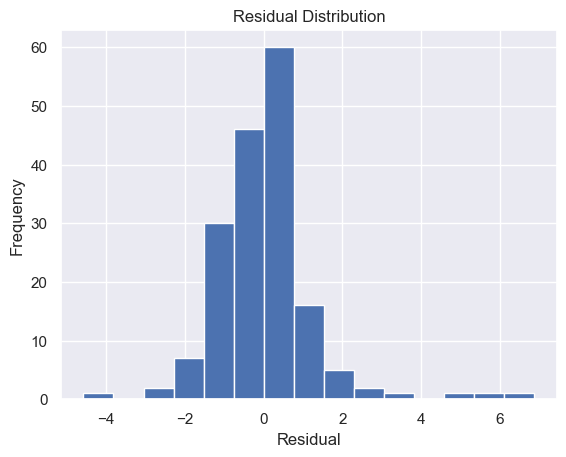

In [327]:
plt.hist(res_lin.resid, bins=15)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

These charts help show us that we can use this model as we believe we've met the neecesary conditions. The fitted values do seem to be centered around e=0, ensuring linearity. We have a sample of all players in this dataset, and are sure it is less than 10% of all players that have played in the Champions League. The true errors also appear relatively normal, it isn't perfect, but is close enough that we can meet this assumption. And although not perpendicular to e=0, there are some outliers in the set, and we think we've met the requirement for equal variance.

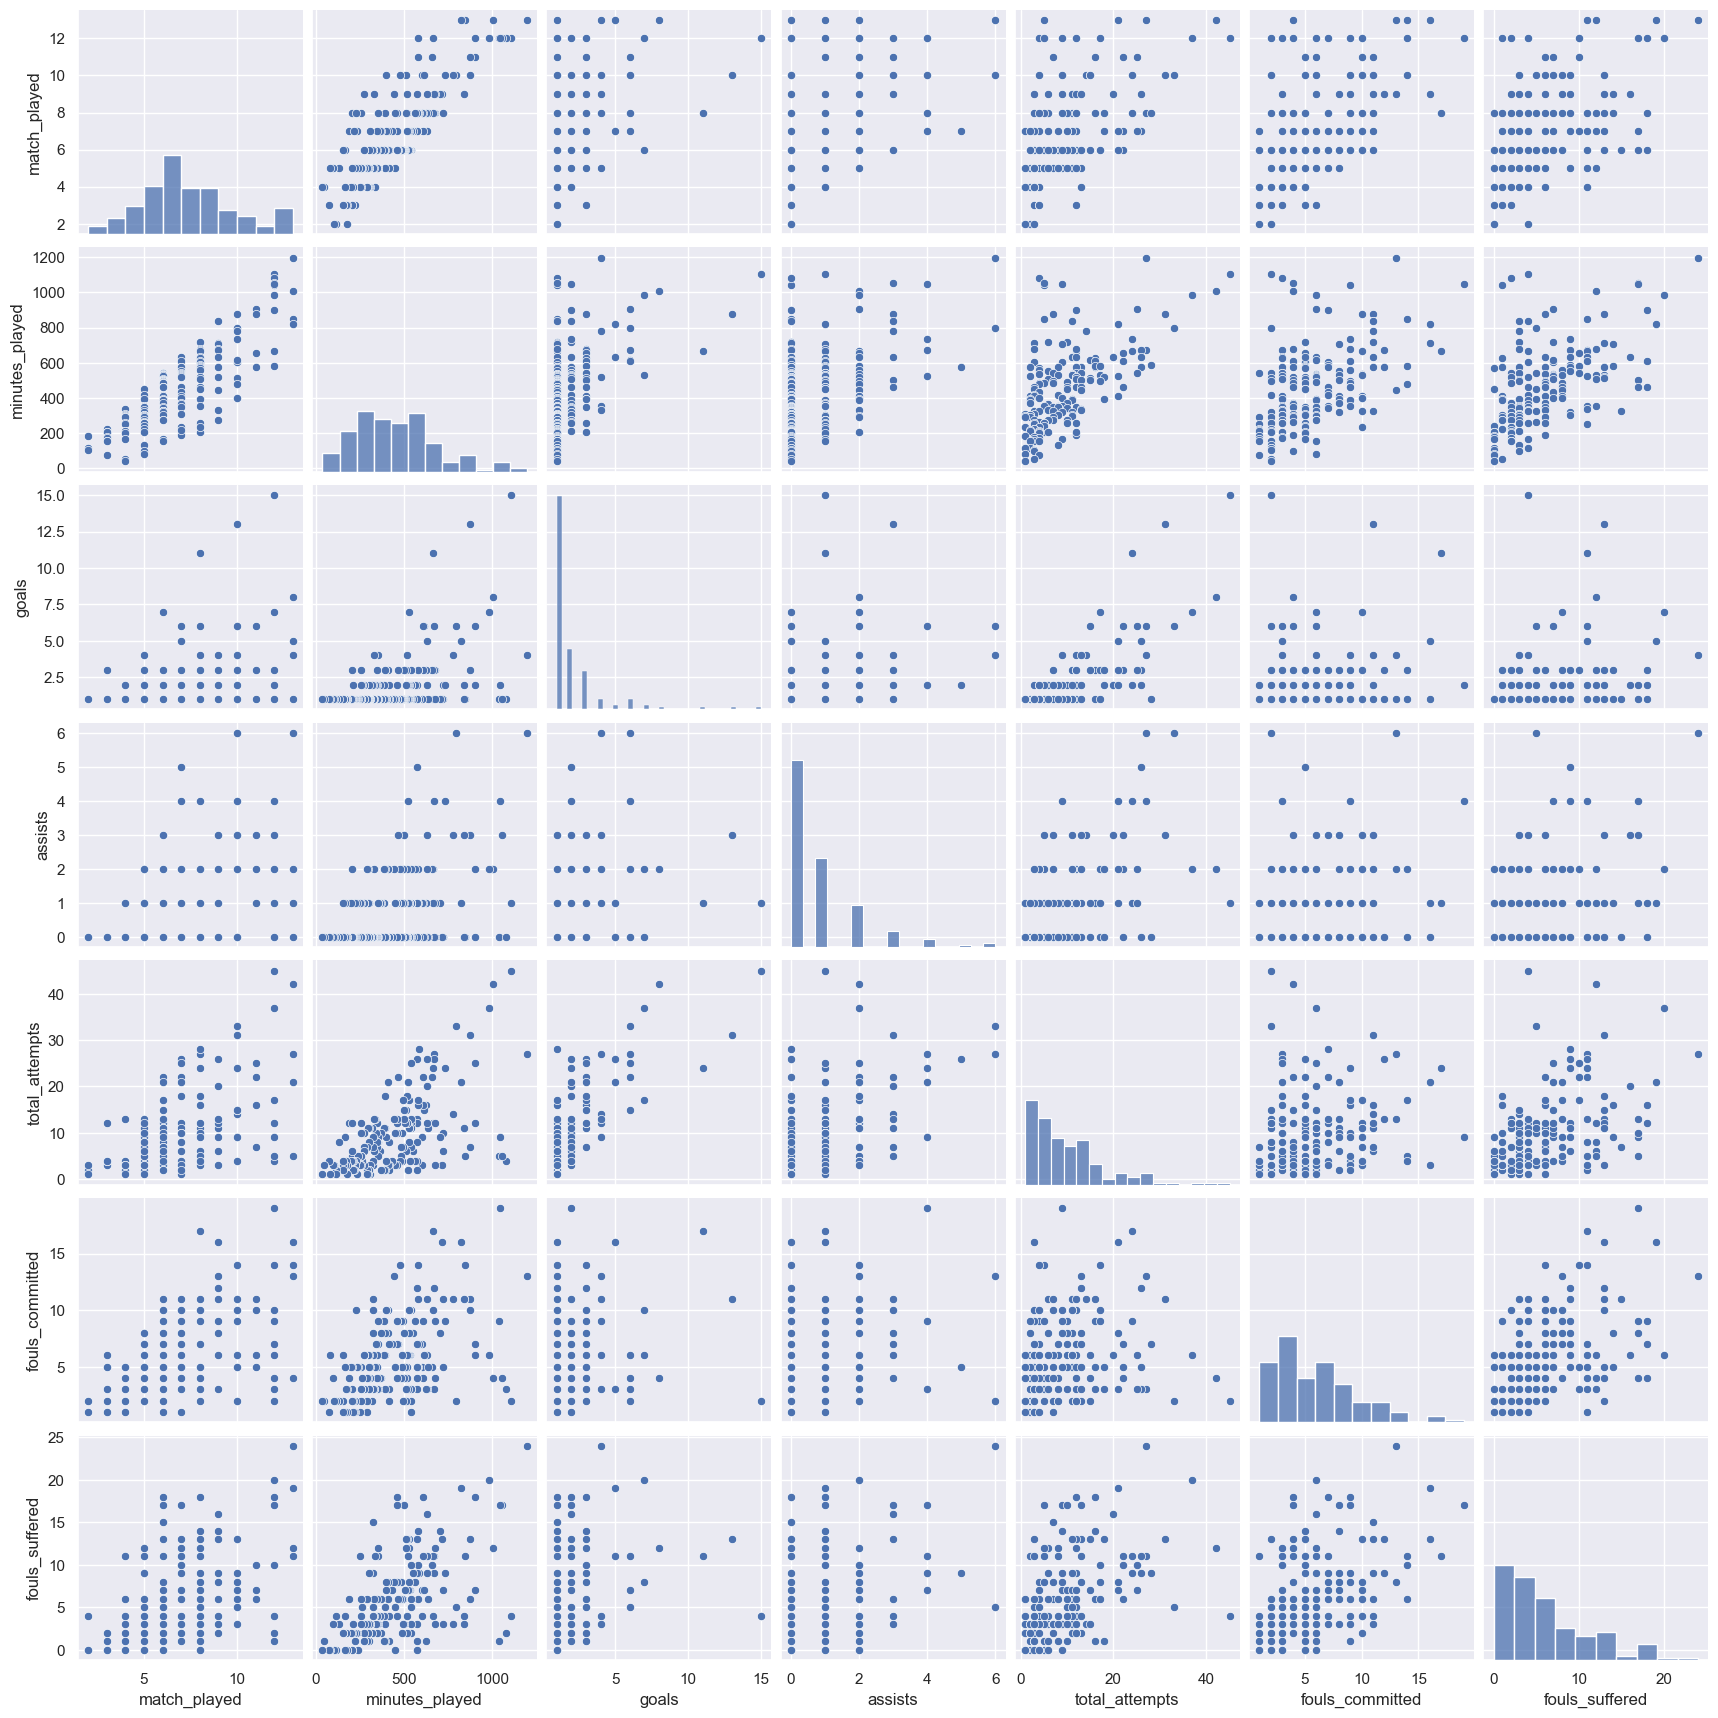

In [328]:
sns.pairplot(df_main[['match_played', 'minutes_played', 'goals', 'assists', 'total_attempts', 'fouls_committed', 'fouls_suffered']])
plt.show()

In [329]:
pred = res_lin.predict(exog=dict(position='Midfielder', match_played=9, minutes_played=630, assists=3, total_attempts=18, fouls_committed=4, fouls_suffered=7))
pred

0    3.009745
dtype: float64

Our prediction is for a Midfielder who played 9 games, and average of 70 minutes in each game, 630 total minutes, with 3 assists and 18 shot attempts. This prediction also account for committing 4 fouls and being fouled 7 times. Our prediction is that a player with these stats would score exactly 3 goals in this season.

In [330]:
df_main[['match_played', 'minutes_played', 'goals', 'assists', 'total_attempts', 'fouls_committed', 'fouls_suffered']].corr()

,match_played,minutes_played,goals,assists,total_attempts,fouls_committed,fouls_suffered
match_played,1.000000,0.836024,0.381959,0.406256,0.509888,0.524694,0.486166
minutes_played,0.836024,1.000000,0.468367,0.448639,0.582359,0.476713,0.558762
goals,0.381959,0.468367,1.000000,0.307222,0.749057,0.128391,0.269844
assists,0.406256,0.448639,0.307222,1.000000,0.494732,0.242620,0.325434
total_attempts,0.509888,0.582359,0.749057,0.494732,1.000000,0.168897,0.481724
fouls_committed,0.524694,0.476713,0.128391,0.242620,0.168897,1.000000,0.430780
fouls_suffered,0.486166,0.558762,0.269844,0.325434,0.481724,0.430780,1.000000


In [331]:
pred_val = res_lin.predict(exog=dict(df_main))
df_main['Predicted_goals'] = pred_val
df_main

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game,Predicted_goals
0,Vinícius Júnior,Real Madrid,Forward,13,1199,4,6,27,3,1,13,24,0.307692,5.601034
1,Benzema,Real Madrid,Forward,12,1106,15,1,45,11,1,2,4,1.250000,10.284427
2,Alaba,Real Madrid,Defender,12,1040,1,0,5,0,1,9,1,0.083333,2.487515
3,Kroos,Real Madrid,Midfielder,12,902,2,0,12,1,1,7,18,0.166667,2.449957
4,Asensio,Real Madrid,Forward,8,207,1,2,5,0,1,2,0,0.125000,0.682947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Nikolov,Sheriff,Midfielder,5,97,1,0,3,1,0,4,3,0.200000,0.614629
169,Kulusevski,Juventus,Midfielder,5,80,1,0,1,0,0,6,0,0.200000,0.463722
170,Alcácer,Villarreal,Forward,3,73,1,0,4,1,0,1,0,0.333333,1.593689
171,Choupo-Moting,Bayern,Midfielder,4,49,1,0,3,0,0,2,1,0.250000,0.944226


## 5. Logistic Regression

 Is there a linear relationship between the log odds of a position and goals, assists, attempts, matches played, minutes played*matches played, fouls committed, and fouls suffered?

In [315]:
df_main['y']=df_main['position'].map({'Midfielder':0,'Forward':1})
df_main = df_main.dropna()
df_main

C:\Users\chris\AppData\Local\Temp\ipykernel_42908\3222182392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['y']=df_main['position'].map({'Midfielder':0,'Forward':1})


,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game,y
0,Vinícius Júnior,Real Madrid,Forward,13,1199,4,6,27,3,1,13,24,0.307692,1
1,Benzema,Real Madrid,Forward,12,1106,15,1,45,11,1,2,4,1.250000,1
3,Kroos,Real Madrid,Midfielder,12,902,2,0,12,1,1,7,18,0.166667,0
4,Asensio,Real Madrid,Forward,8,207,1,2,5,0,1,2,0,0.125000,1
5,Salah,Liverpool,Forward,13,1008,8,2,42,0,8,4,12,0.615385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Nikolov,Sheriff,Midfielder,5,97,1,0,3,1,0,4,3,0.200000,0
169,Kulusevski,Juventus,Midfielder,5,80,1,0,1,0,0,6,0,0.200000,0
170,Alcácer,Villarreal,Forward,3,73,1,0,4,1,0,1,0,0.333333,1
171,Choupo-Moting,Bayern,Midfielder,4,49,1,0,3,0,0,2,1,0.250000,0


Can we accurately predict whether a player is a midfielder or forward based on the following variables; goals, assists, attempts, matches played, minutes played*matches played, fouls committed, and fouls suffered?

In [249]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_main, test_size=0.20, random_state=123)
current_mod=smf.logit('y~goals + assists + match_played + total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.597152
         Iterations 6
ITERATION 1: BIC of the Current Model 176.2284291895816


In [250]:
test_mod=smf.logit('y~goals + assists + match_played + total_attempts + minutes_played*match_played + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_suffered from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.597478
         Iterations 6
BIC of Test Model that Deletes fouls_suffered from the Current Model 171.58296761678636


In [251]:
test_mod=smf.logit('y~goals + assists + match_played + total_attempts + minutes_played*match_played + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_comitted from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.600509
         Iterations 6
BIC of Test Model that Deletes fouls_comitted from the Current Model 172.26202786601473


In [252]:
test_mod=smf.logit('y~goals + assists + match_played + minutes_played*match_played + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.640830
         Iterations 6
BIC of Test Model that Deletes total_attempts from the Current Model 181.29387491548883


In [253]:
test_mod=smf.logit('y~goals + assists + total_attempts + minutes_played*match_played + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.597152
         Iterations 6
BIC of Test Model that Deletes match_played from the Current Model 176.2284291895816


In [254]:
test_mod=smf.logit('y~goals +  match_played + total_attempts + minutes_played*match_played + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes assists from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.600590
         Iterations 6
BIC of Test Model that Deletes assists from the Current Model 172.2802457639332


In [255]:
test_mod=smf.logit('y~ assists + match_played + total_attempts + minutes_played*match_played + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes goals from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.597586
         Iterations 6
BIC of Test Model that Deletes goals from the Current Model 171.60716953612015


In [256]:
test_mod=smf.logit('y~ goals + assists + match_played + total_attempts  + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes minutes_played*match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.631634
         Iterations 5
BIC of Test Model that Deletes minutes_played*match_played from the Current Model 174.51545255871898


With the 2nd iteration we have omitted the assists variable as the lowest BIC resulted from its omission.

In [257]:
current_mod=smf.logit('y~goals + match_played + total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.600590
         Iterations 6
ITERATION 2: BIC of the Current Model 172.2802457639332


In [258]:
test_mod=smf.logit('y~ goals + match_played + total_attempts + fouls_suffered + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes minutes_played*match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.638166
         Iterations 5
BIC of Test Model that Deletes minutes_played*match_played from the Current Model 171.2602147474705


In [259]:
test_mod=smf.logit('y~ goals + match_played + total_attempts + minutes_played*match_played + fouls_committed', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_suffered from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.600743
         Iterations 6
BIC of Test Model that Deletes fouls_suffered from the Current Model 167.59587392484056


In [260]:
test_mod=smf.logit('y~ goals + match_played + total_attempts + minutes_played*match_played + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_committed from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.603667
         Iterations 6
BIC of Test Model that Deletes fouls_committed from the Current Model 168.2508745212538


In [261]:
test_mod=smf.logit('y~ goals + match_played + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.640830
         Iterations 6
BIC of Test Model that Deletes total_attempts from the Current Model 176.57538205992847


In [262]:
test_mod=smf.logit('y~ goals + total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.600590
         Iterations 6
BIC of Test Model that Deletes match_played from the Current Model 172.2802457639332


In [263]:
test_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes goals from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.601462
         Iterations 6
BIC of Test Model that Deletes goals from the Current Model 167.75687252770186


With the 3rd iteration we have omitted the goals variable as the lowest BIC resulted from its omission.

In [264]:
current_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.601462
         Iterations 6
ITERATION 3: BIC of the Current Model 167.75687252770186


In [265]:
test_mod=smf.logit('y~ total_attempts + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.601462
         Iterations 6
BIC of Test Model that Deletes match_played from the Current Model 167.75687252770186


In [266]:
test_mod=smf.logit('y~ match_played + minutes_played*match_played + fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.666888
         Iterations 5
BIC of Test Model that Deletes total_attempts from the Current Model 177.69388059603517


In [267]:
test_mod=smf.logit('y~ match_played + total_attempts +  fouls_committed + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes minutes_played*match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.639460
         Iterations 5
BIC of Test Model that Deletes minutes_played*match_played from the Current Model 166.83148014240868


In [268]:
test_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played +  fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_committed from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.604951
         Iterations 6
BIC of Test Model that Deletes fouls_committed from the Current Model 163.82006801085492


In [269]:
test_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played + fouls_committed ', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_suffered from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.601836
         Iterations 6
BIC of Test Model that Deletes fouls_suffered from the Current Model 163.12220831480636


With the 4th iteration we have omitted the fouls_committed variable as the lowest BIC resulted from its omission.

In [270]:
current_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played + fouls_suffered', data=df_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.604951
         Iterations 6
ITERATION 3: BIC of the Current Model 163.82006801085492


In [271]:
test_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played ', data=df_train).fit()
print('BIC of Test Model that Deletes fouls_suffered from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.606106
         Iterations 6
BIC of Test Model that Deletes fouls_suffered from the Current Model 159.36018609150162


In [272]:
test_mod=smf.logit('y~ match_played + total_attempts + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes minutes_played*match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.643690
         Iterations 5
BIC of Test Model that Deletes minutes_played*match_played from the Current Model 163.06055456273384


In [273]:
test_mod=smf.logit('y~ match_played + minutes_played*match_played + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts  from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.677905
         Iterations 5
BIC of Test Model that Deletes total_attempts  from the Current Model 175.4433134034071


In [274]:
test_mod=smf.logit('y~ total_attempts + minutes_played*match_played + fouls_suffered', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.604951
         Iterations 6
BIC of Test Model that Deletes match_played from the Current Model 163.82006801085498


With the 5th iteration we have omitted the fouls_suffered variable as the lowest BIC resulted from its omission.

In [275]:
current_mod=smf.logit('y~ match_played + total_attempts + minutes_played*match_played', data=df_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.606106
         Iterations 6
ITERATION 3: BIC of the Current Model 159.36018609150162


In [276]:
test_mod=smf.logit('y~ match_played + total_attempts', data=df_train).fit()
print('BIC of Test Model that Deletes minutes_played*match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.652211
         Iterations 5
BIC of Test Model that Deletes minutes_played*match_played from the Current Model 160.25075991763921


In [277]:
test_mod=smf.logit('y~ minutes_played*match_played + total_attempts', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.606106
         Iterations 6
BIC of Test Model that Deletes match_played from the Current Model 159.36018609150162


In [278]:
test_mod=smf.logit('y~ match_played + minutes_played*match_played ', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.679318
         Iterations 5
BIC of Test Model that Deletes total_attempts from the Current Model 171.04122115886003


With the 6th iteration we have omitted the interaction term minutes_played*match_played variable as the lowest BIC resulted from its omission.

In [279]:
current_mod=smf.logit('y~ match_played + total_attempts', data=df_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.652211
         Iterations 5
ITERATION 3: BIC of the Current Model 160.25075991763921


In [280]:
test_mod=smf.logit('y~ match_played', data=df_train).fit()
print('BIC of Test Model that Deletes total_attempts from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.688791
         Iterations 4
BIC of Test Model that Deletes total_attempts from the Current Model 163.72612881516903


In [281]:
test_mod=smf.logit('y~ total_attempts', data=df_train).fit()
print('BIC of Test Model that Deletes match_played from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.665691
         Iterations 5
BIC of Test Model that Deletes match_played from the Current Model 158.551729067658


With the 7th iteration we have omitted the match_played variable as the lowest BIC resulted from its omission.

In [282]:
final_mod=smf.logit('y~ total_attempts', data=df_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.665691
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 May 2023   Pseudo R-squ.:                 0.03405
Time:                        12:21:45   Log-Likelihood:                -74.557
converged:                       True   LL-Null:                       -77.185
Covariance Type:            nonrobust   LLR p-value:                   0.02187
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8011      0.342     -2.341      0.019      -1.472      -0.130
total_attempts     0.0597      0.027      2.179      0.029       0.006       0.113
==================================================================================
"""

y^ = -1.0553 + 0.0862[total_attempts]

Conditions:

1. This is a random sample because we split our initial data set into a test and train dataframes randomly.

2. 112<10% of the population of all players in the history of the UCL, so independence is met.

3. Linearity: Look at simple logistic regression curve and look for an s shape curve.

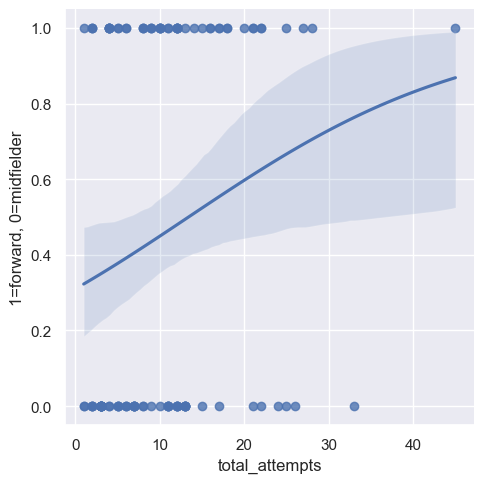

In [283]:
sns.lmplot(x="total_attempts", y='y',data=df_train, logistic=True)
plt.ylabel('1=forward, 0=midfielder')
plt.show()

3. Because our simple logistic regression curve looks like an s curve, we assume linearity.
4. We only have one numerical explanatory variable (matches played), so we do not need to check this condition in this case.

All of our conditions have been met above, thus our logistic regression model that predicts the position of a player in the sample of players from the 2021-2022 UCL season, is a good fit of the data and for conducting valid inferences.

We will continue by checking if we have sufficient evidence to suggest that our total attempts slope is non-zero.
Ho: B1 = 0
Ha: B2 != 0

In [284]:
test_statistic = 3.191
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('pvalue:' , pvalue)

pvalue: 0.0014178128024693315


Because the p‑value =  0.0014178128024693315, we reject the null hypothesis at a significance level of 0.05. Thus we can say the  there is sufficient evidence to suggest that the population slope for total attempts in this model is non‑zero (ie.)

In [285]:
pred_probabilities=final_mod.predict(exog=dict(df_test))
df_test['predictive_prob']=pred_probabilities
df_test

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game,y,predictive_prob
134,Chukwueze,Villarreal,Midfielder,9,273,2,0,3,0,2,6,2,0.222222,0.0,0.349344
161,Yansané,Sheriff,Forward,3,156,1,0,3,0,0,1,2,0.333333,1.0,0.349344
142,Dybala,Juventus,Forward,5,255,3,1,12,0,3,2,6,0.600000,1.0,0.478885
60,Moumi Ngamaleu,Young Boys,Midfielder,6,532,1,1,11,1,0,10,13,0.166667,0.0,0.464006
39,Núñez,Benfica,Forward,10,613,6,0,15,5,0,6,7,0.600000,1.0,0.523639
105,Larin,Beşiktaş,Forward,5,354,1,0,8,0,0,7,11,0.200000,1.0,0.419857
98,Malen,Dortmund,Forward,6,392,3,0,11,1,2,6,5,0.500000,1.0,0.464006
44,Paulinho,Sporting CP,Forward,8,582,3,1,16,0,3,5,14,0.375000,1.0,0.538509
5,Salah,Liverpool,Forward,13,1008,8,2,42,0,8,4,12,0.615385,1.0,0.846430
159,Kean,Juventus,Forward,6,168,1,0,9,0,0,5,0,0.166667,1.0,0.434467


In [286]:
df_test['yhat']=1*(df_test['predictive_prob']>0.5)
df_test

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game,y,predictive_prob,yhat
134,Chukwueze,Villarreal,Midfielder,9,273,2,0,3,0,2,6,2,0.222222,0.0,0.349344,0
161,Yansané,Sheriff,Forward,3,156,1,0,3,0,0,1,2,0.333333,1.0,0.349344,0
142,Dybala,Juventus,Forward,5,255,3,1,12,0,3,2,6,0.600000,1.0,0.478885,0
60,Moumi Ngamaleu,Young Boys,Midfielder,6,532,1,1,11,1,0,10,13,0.166667,0.0,0.464006,0
39,Núñez,Benfica,Forward,10,613,6,0,15,5,0,6,7,0.600000,1.0,0.523639,1
105,Larin,Beşiktaş,Forward,5,354,1,0,8,0,0,7,11,0.200000,1.0,0.419857,0
98,Malen,Dortmund,Forward,6,392,3,0,11,1,2,6,5,0.500000,1.0,0.464006,0
44,Paulinho,Sporting CP,Forward,8,582,3,1,16,0,3,5,14,0.375000,1.0,0.538509,1
5,Salah,Liverpool,Forward,13,1008,8,2,42,0,8,4,12,0.615385,1.0,0.846430,1
159,Kean,Juventus,Forward,6,168,1,0,9,0,0,5,0,0.166667,1.0,0.434467,0


In [291]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat']).ravel()
(tn, fp, fn, tp)

(11, 1, 8, 9)

In [288]:
sensitivity=tp/(tp+fn)
print('sensitivity:', sensitivity)
specificity=tn/(tn+fp)
print('specificity:', specificity)
false_positive_rate=fp/(tn+fp)
print('false positive rate:', false_positive_rate)

sensitivity: 0.5294117647058824
specificity: 0.9166666666666666
false positive rate: 0.08333333333333333


In [298]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'], y_score=df_test["predictive_prob"])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test["predictive_prob"])
print(auc)

0.7181372549019608


In [299]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
        label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

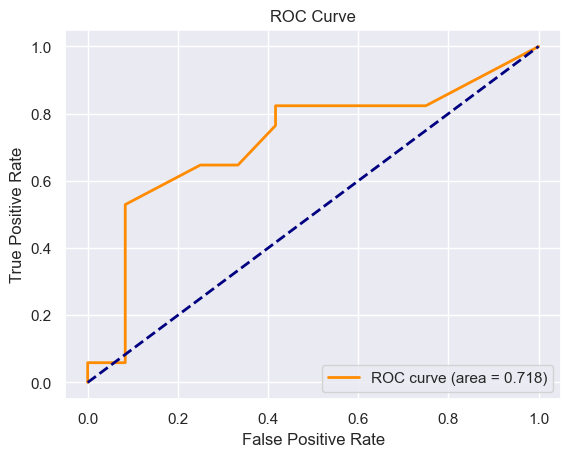

In [300]:
plot_roc(fprs, tprs, auc)

In [301]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],'tpr':[tpr],'fpr':[fpr]})

In [304]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['predictive_prob'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr  fpr
0       0.13  1.0  1.0
   threshold  tpr  fpr
0       0.14  1.0  1.0
   threshold  tpr  fpr
0       0.15  1.0  1.0
   threshold  tpr  fpr
0       0.16  1.0  1.0
   threshold  tpr  fpr
0       0.17  1.0  1.0
   threshold  tpr  fpr
0       0.18  1.0  1.0
   threshold  tpr  fpr
0       0.19  1.0  1.0
   threshold  tpr  fpr
0        0.2  1.0  1.0
   threshold  tpr  fpr
0       0.2

We will use a threshold of 0.48 because it gets our fpr closest to 0.1. We chose 0.1 as fpr of interest from our ROC curve because the curve after 0.1 fpr the tpr does not increase significantly. This will get us a tpr of 0.529412.

For our research question, the stakes are not large thus we are not concerned with classifying a player incorrectly, we just seek to find a threshold that gives us a balanced fpr and tpr.

In [310]:
df_test['new_yhat']=1*(df_test['predictive_prob']>0.48)
df_test

,player_name,club,position,match_played,minutes_played,goals,assists,total_attempts,right_foot,left_foot,fouls_committed,fouls_suffered,goals_per_game,y,predictive_prob,yhat,new_phat,new_yhat
134,Chukwueze,Villarreal,Midfielder,9,273,2,0,3,0,2,6,2,0.222222,0.0,0.349344,0,0,0
161,Yansané,Sheriff,Forward,3,156,1,0,3,0,0,1,2,0.333333,1.0,0.349344,0,0,0
142,Dybala,Juventus,Forward,5,255,3,1,12,0,3,2,6,0.600000,1.0,0.478885,0,0,0
60,Moumi Ngamaleu,Young Boys,Midfielder,6,532,1,1,11,1,0,10,13,0.166667,0.0,0.464006,0,0,0
39,Núñez,Benfica,Forward,10,613,6,0,15,5,0,6,7,0.600000,1.0,0.523639,1,1,1
105,Larin,Beşiktaş,Forward,5,354,1,0,8,0,0,7,11,0.200000,1.0,0.419857,0,0,0
98,Malen,Dortmund,Forward,6,392,3,0,11,1,2,6,5,0.500000,1.0,0.464006,0,0,0
44,Paulinho,Sporting CP,Forward,8,582,3,1,16,0,3,5,14,0.375000,1.0,0.538509,1,1,1
5,Salah,Liverpool,Forward,13,1008,8,2,42,0,8,4,12,0.615385,1.0,0.846430,1,1,1
159,Kean,Juventus,Forward,6,168,1,0,9,0,0,5,0,0.166667,1.0,0.434467,0,0,0


In [312]:
confusion_matrix(y_true=df_test['y'], y_pred=df_test['new_yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], y_pred=df_test['new_yhat']).ravel()
(tn, fp, fn, tp)

(11, 1, 8, 9)

In [314]:
sensitivity=tp/(tp+fn)
print('sensitivity:', sensitivity)
specificity=tn/(tn+fp)
print('specificity:', specificity)
false_positive_rate=fp/(tn+fp)
print('false positive rate:', false_positive_rate)

sensitivity: 0.5294117647058824
specificity: 0.9166666666666666
false positive rate: 0.08333333333333333


The tpr is 0.5294117647058824 and our fpr is 0.08333333333333333.

While our fpr is only about 8.3%, our tpr is only 53.94%, thus I would say that we cannot accurately predict the log odds that a player is a forward based on their total attempts. We have satisfied all conditions but we would like to have a logistic regression model that estimates our log odds of being a forward at higher tpr.